In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 自定义一个df
a = pd.DataFrame({'a':[1,2,3],'b':[4,5,6],'c':[7,8,9]})

# 随机一个500*504的数组，均值为0，标准差为1
stock = np.random.normal(0,1,(500,504))

# ndarray转换成df
pd.DataFrame(stock).head()    # 与ndarray对比，加了行和列的索引，方便查询获取数据

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,-0.820932,-0.596915,2.129947,-1.686801,1.317989,-0.015559,-0.852032,-1.506702,0.183893,0.277470,...,0.847402,-2.493119,-0.581025,1.205625,-0.618853,-2.537606,-0.786215,-1.407216,-1.960286,-0.281924
1,1.961155,-0.733560,-0.544343,0.457815,0.395290,-1.693565,0.368962,0.316497,-0.695772,-0.067593,...,0.992163,0.481838,1.765956,0.061929,0.351345,0.825752,1.574886,0.484857,0.180226,0.025518
2,-0.358913,-0.947966,-0.275730,-1.834284,0.074591,0.516052,-0.945502,-0.451731,1.502323,2.732797,...,-0.549037,-0.209474,-0.100650,-0.340194,-0.203540,0.242309,2.169931,-1.227996,-0.474793,0.064488
3,-0.511605,0.631831,-0.388117,0.489882,0.309375,0.762827,-0.888652,-0.939234,0.610644,0.779021,...,0.997354,-0.440380,-1.136279,0.445762,0.159396,-0.746224,-0.441368,0.027688,0.146669,-1.427347
4,1.269786,-0.003806,-0.415801,0.169599,0.585850,-0.425194,0.136981,-1.948547,-1.383902,-0.633808,...,-0.156774,-0.131076,-1.216632,0.252428,-0.320718,1.056327,0.470441,-1.190869,1.372078,-0.636056


#### 构造时间列表（包括周末）：
- pd.data_range(start,end,periods,freq)
    - start 开始时间；
    - end 截止时间（可不写）；
    - period 总天数；
    - freq 递进单位，默认1天

In [23]:
# 1. 构造行索引名的列表：变成股票1，股票2……，股票500
# stock.shape = (500,504)，stock.shape[0] = 500
stock_name = ["股票" + str(i+1) for i in range(stock.shape[0])]

# 2. 构造列索引名的列表(不过滤周末)：
date = pd.date_range("2012-01-01", periods=stock.shape[1], freq="D")

# 3. 将ndarray转换成DataFrame，并且添加行、列索引名
stock = pd.DataFrame(stock, index=stock_name, columns=date)    # index 指定行索引名，columns 指定列索引名
stock.head()

,2012-01-01 00:00:00,2012-01-02 00:00:00,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-07 00:00:00,2012-01-08 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,...,2013-05-09 00:00:00,2013-05-10 00:00:00,2013-05-11 00:00:00,2013-05-12 00:00:00,2013-05-13 00:00:00,2013-05-14 00:00:00,2013-05-15 00:00:00,2013-05-16 00:00:00,2013-05-17 00:00:00,2013-05-18 00:00:00
股票1,-0.820932,-0.596915,2.129947,-1.686801,1.317989,-0.015559,-0.852032,-1.506702,0.183893,0.277470,...,0.847402,-2.493119,-0.581025,1.205625,-0.618853,-2.537606,-0.786215,-1.407216,-1.960286,-0.281924
股票2,1.961155,-0.733560,-0.544343,0.457815,0.395290,-1.693565,0.368962,0.316497,-0.695772,-0.067593,...,0.992163,0.481838,1.765956,0.061929,0.351345,0.825752,1.574886,0.484857,0.180226,0.025518
股票3,-0.358913,-0.947966,-0.275730,-1.834284,0.074591,0.516052,-0.945502,-0.451731,1.502323,2.732797,...,-0.549037,-0.209474,-0.100650,-0.340194,-0.203540,0.242309,2.169931,-1.227996,-0.474793,0.064488
股票4,-0.511605,0.631831,-0.388117,0.489882,0.309375,0.762827,-0.888652,-0.939234,0.610644,0.779021,...,0.997354,-0.440380,-1.136279,0.445762,0.159396,-0.746224,-0.441368,0.027688,0.146669,-1.427347
股票5,1.269786,-0.003806,-0.415801,0.169599,0.585850,-0.425194,0.136981,-1.948547,-1.383902,-0.633808,...,-0.156774,-0.131076,-1.216632,0.252428,-0.320718,1.056327,0.470441,-1.190869,1.372078,-0.636056


In [24]:
# 转置：将行和列互换
stock = stock.T
stock.head()

,股票1,股票2,股票3,股票4,股票5,股票6,股票7,股票8,股票9,股票10,...,股票491,股票492,股票493,股票494,股票495,股票496,股票497,股票498,股票499,股票500
2012-01-01,-0.820932,1.961155,-0.358913,-0.511605,1.269786,-0.399976,0.799555,-0.883546,1.781328,0.604998,...,0.479162,0.726379,-0.075937,-1.034127,-0.514361,-1.660081,-0.479333,0.180925,-0.409614,1.313380
2012-01-02,-0.596915,-0.733560,-0.947966,0.631831,-0.003806,-0.271507,-1.271014,1.219144,0.486456,0.959284,...,1.016388,1.235870,-1.328065,0.540438,1.899946,1.102549,0.921921,-1.268620,0.797829,0.115862
2012-01-03,2.129947,-0.544343,-0.275730,-0.388117,-0.415801,-0.779318,-0.359755,0.967475,1.687893,-0.794359,...,1.234459,-1.906935,0.271100,0.683883,-1.541552,-0.360219,0.666791,-0.254659,-1.394178,-0.375046
2012-01-04,-1.686801,0.457815,-1.834284,0.489882,0.169599,0.569685,0.379484,0.261237,0.122248,0.673847,...,0.258570,-0.872705,-0.732248,-0.265647,-0.158221,-0.667572,-0.647073,-1.190862,-0.663545,0.791948
2012-01-05,1.317989,0.395290,0.074591,0.309375,0.585850,-0.446595,1.145473,1.238713,-0.537901,-0.302347,...,0.511839,0.722119,-0.202265,0.499207,-0.065381,-0.328918,1.932009,1.224216,-0.409957,-1.377810


## 1. DataFrame中的属性
- df.head()    df.tail()    df.shape    df.index    df.columns

In [25]:
# 获取前n行的数据
stock.head(6)  # 默认前5行

,股票1,股票2,股票3,股票4,股票5,股票6,股票7,股票8,股票9,股票10,...,股票491,股票492,股票493,股票494,股票495,股票496,股票497,股票498,股票499,股票500
2012-01-01,-0.820932,1.961155,-0.358913,-0.511605,1.269786,-0.399976,0.799555,-0.883546,1.781328,0.604998,...,0.479162,0.726379,-0.075937,-1.034127,-0.514361,-1.660081,-0.479333,0.180925,-0.409614,1.313380
2012-01-02,-0.596915,-0.733560,-0.947966,0.631831,-0.003806,-0.271507,-1.271014,1.219144,0.486456,0.959284,...,1.016388,1.235870,-1.328065,0.540438,1.899946,1.102549,0.921921,-1.268620,0.797829,0.115862
2012-01-03,2.129947,-0.544343,-0.275730,-0.388117,-0.415801,-0.779318,-0.359755,0.967475,1.687893,-0.794359,...,1.234459,-1.906935,0.271100,0.683883,-1.541552,-0.360219,0.666791,-0.254659,-1.394178,-0.375046
2012-01-04,-1.686801,0.457815,-1.834284,0.489882,0.169599,0.569685,0.379484,0.261237,0.122248,0.673847,...,0.258570,-0.872705,-0.732248,-0.265647,-0.158221,-0.667572,-0.647073,-1.190862,-0.663545,0.791948
2012-01-05,1.317989,0.395290,0.074591,0.309375,0.585850,-0.446595,1.145473,1.238713,-0.537901,-0.302347,...,0.511839,0.722119,-0.202265,0.499207,-0.065381,-0.328918,1.932009,1.224216,-0.409957,-1.377810
2012-01-06,-0.015559,-1.693565,0.516052,0.762827,-0.425194,1.676627,0.980998,0.809294,1.437315,1.389588,...,1.410088,-0.825196,-0.595847,0.643265,-0.581781,-0.134278,0.965953,0.356314,0.784832,-0.535393


In [26]:
# 获取倒数n行的数据
stock.tail()   # 默认后5行

,股票1,股票2,股票3,股票4,股票5,股票6,股票7,股票8,股票9,股票10,...,股票491,股票492,股票493,股票494,股票495,股票496,股票497,股票498,股票499,股票500
2013-05-14,-2.537606,0.825752,0.242309,-0.746224,1.056327,-0.143726,-1.038423,-1.734044,0.060604,-1.631390,...,-0.598309,-0.579069,-0.620120,0.387070,1.222477,-0.366438,-1.115523,-2.020874,0.259041,-0.046334
2013-05-15,-0.786215,1.574886,2.169931,-0.441368,0.470441,1.530858,0.774585,0.403590,-0.297996,-0.592095,...,-0.061976,-2.376888,-1.030041,-0.662963,0.030724,-0.862345,0.787478,-0.482423,1.533487,0.008242
2013-05-16,-1.407216,0.484857,-1.227996,0.027688,-1.190869,0.544574,-1.417137,1.072739,2.031748,0.115658,...,-0.520904,-0.280725,-1.991526,0.501090,1.995994,0.092739,0.014364,-0.934839,-0.478063,0.547935
2013-05-17,-1.960286,0.180226,-0.474793,0.146669,1.372078,-0.721504,0.748060,-1.524941,-2.107715,-0.563921,...,0.056983,0.385512,-0.156816,-0.613107,0.958285,-1.073738,-0.985685,-1.360031,-0.076814,0.153406
2013-05-18,-0.281924,0.025518,0.064488,-1.427347,-0.636056,-0.941595,1.018986,0.902128,-0.635108,0.266371,...,0.294559,0.968319,0.003146,0.970148,0.709445,-0.009135,0.027798,0.204640,-0.379021,1.129530


In [27]:
# 形状
print("形状：", stock.shape)
# 行索引
print("行索引：", stock.index)
# 列索引
print("列索引：", stock.columns)

形状： (504, 500)
行索引： DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2013-05-09', '2013-05-10', '2013-05-11', '2013-05-12',
               '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16',
               '2013-05-17', '2013-05-18'],
              dtype='datetime64[ns]', length=504, freq='D')
列索引： Index(['股票1', '股票2', '股票3', '股票4', '股票5', '股票6', '股票7', '股票8', '股票9', '股票10',
       ...
       '股票491', '股票492', '股票493', '股票494', '股票495', '股票496', '股票497', '股票498',
       '股票499', '股票500'],
      dtype='object', length=500)


In [28]:
# 中途修改行列索引

# 单独修改行列索引名称：
# stock.rename(index={"2012-01-01":"1"}, columns={"股票1":"股票01"}, inplace=True)    # inplace=True, 在原dataframe上改动
# stock.rename(index={'A':'D', 'B':'E', 'C':'F'}, columns={'a':'d', 'b':'e', 'c':'f'}, inplace = True)

# 修改所有列索引
stock.columns = ["股票_" + str(i) for i in range(data.shape[1])]
stock.head()

,股票_0,股票_1,股票_2,股票_3,股票_4,股票_5,股票_6,股票_7,股票_8,股票_9,...,股票_490,股票_491,股票_492,股票_493,股票_494,股票_495,股票_496,股票_497,股票_498,股票_499
2012-01-01,-0.820932,1.961155,-0.358913,-0.511605,1.269786,-0.399976,0.799555,-0.883546,1.781328,0.604998,...,0.479162,0.726379,-0.075937,-1.034127,-0.514361,-1.660081,-0.479333,0.180925,-0.409614,1.313380
2012-01-02,-0.596915,-0.733560,-0.947966,0.631831,-0.003806,-0.271507,-1.271014,1.219144,0.486456,0.959284,...,1.016388,1.235870,-1.328065,0.540438,1.899946,1.102549,0.921921,-1.268620,0.797829,0.115862
2012-01-03,2.129947,-0.544343,-0.275730,-0.388117,-0.415801,-0.779318,-0.359755,0.967475,1.687893,-0.794359,...,1.234459,-1.906935,0.271100,0.683883,-1.541552,-0.360219,0.666791,-0.254659,-1.394178,-0.375046
2012-01-04,-1.686801,0.457815,-1.834284,0.489882,0.169599,0.569685,0.379484,0.261237,0.122248,0.673847,...,0.258570,-0.872705,-0.732248,-0.265647,-0.158221,-0.667572,-0.647073,-1.190862,-0.663545,0.791948
2012-01-05,1.317989,0.395290,0.074591,0.309375,0.585850,-0.446595,1.145473,1.238713,-0.537901,-0.302347,...,0.511839,0.722119,-0.202265,0.499207,-0.065381,-0.328918,1.932009,1.224216,-0.409957,-1.377810


## Series类型


- 从DataFrame里拿出一列数据（1维数据）
- Series中有独特的api处理数据

In [29]:
stock["股票_0"].head()

2012-01-01   -0.820932
2012-01-02   -0.596915
2012-01-03    2.129947
2012-01-04   -1.686801
2012-01-05    1.317989
Freq: D, Name: 股票_0, dtype: float64

# 2. Pandas 基本操作


## 2.1 索引和切片

- 先列后行
- loc: 以标签(label)作为索引取值
- iloc: 以下标(index)作为索引取值
- ix: 混合索引取值


## 2.2 排序

- 按行索引排序（默认从小到大）：df.sort_index()
    
    
## 2.3 统计

- 基本统计分析函数
- 累计统计分析函数


## 2.4 逻辑条件进行数据筛选

- 单个条件
- 混合条件


## 2.5 运算

## 2.0. 获取数据

In [30]:
# 获取某支股票，一段时间的数据
data = pd.read_csv("/Users/zhengtaizhong/Desktop/stock_day.csv")
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [31]:
# 对【行索引】进行排序
data = data.sort_index()
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


## 2.1 索引和切片

In [32]:
# 获取单个数据：
# 指定列索引 --> series
data["open"]["2018-02-27"]    # 先列后行

23.53

In [33]:
# 使用【loc配合标签label(行列名称)作为索引】选取切片
data.loc["2015-03-02":"2015-03-06", "open"]    # [行索引切片，列索引切片]，切片只能从前往后

2015-03-02    12.25
2015-03-03    12.52
2015-03-04    12.80
2015-03-05    12.88
2015-03-06    13.17
Name: open, dtype: float64

In [38]:
# 使用【iloc配合下标index作为索引】选取切片
data.iloc[0:5,0:3]

,open,high,close
2015-03-02,12.25,12.67,12.52
2015-03-03,12.52,13.06,12.70
2015-03-04,12.80,12.92,12.90
2015-03-05,12.88,13.45,13.16
2015-03-06,13.17,14.48,14.28


In [39]:
# 把["open","high","close"]看做一个整体
data[["open","high","close"]][0:3]

,open,high,close
2015-03-02,12.25,12.67,12.52
2015-03-03,12.52,13.06,12.70
2015-03-04,12.80,12.92,12.90


In [40]:
# 组合索引，混合使用下标和行列名：ix
data.ix[0:3,["open","high","close"]]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,open,high,close
2015-03-02,12.25,12.67,12.52
2015-03-03,12.52,13.06,12.70
2015-03-04,12.80,12.92,12.90


## 2.2 排序  

In [41]:
# 选取涨跌幅最小（=跌幅最大）的5支股票, 默认从小到大
data.sort_values(by="p_change").head()

# data.sort_values(by="p_change", ascending=False).head()    # 从大到小

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-09-01,14.78,14.78,13.46,13.46,78985.85,-1.50,-10.03,15.080,17.434,18.617,109001.30,103741.22,106218.95,2.70
2015-09-14,16.62,16.64,14.46,14.46,139701.77,-1.61,-10.02,14.726,14.363,16.881,98449.69,89159.54,101431.96,4.78
2016-01-11,16.59,17.24,15.90,15.90,58036.37,-1.77,-10.02,18.298,20.068,21.648,46971.51,52066.53,58356.88,1.99
2015-07-15,22.78,23.04,22.10,22.10,85966.42,-2.46,-10.02,24.564,25.197,28.530,158767.95,149753.04,149835.16,2.94
2015-08-26,17.00,18.35,15.56,15.56,130318.31,-1.73,-10.01,18.742,20.042,19.087,100097.45,114432.06,102945.90,4.46


In [42]:
# 同时排序两个列索引
data.sort_values(by=["open","high"]).head()    # 当open相等时，以high排序

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-09-02,12.30,14.11,12.36,12.30,70201.74,-1.10,-8.17,14.440,16.591,18.360,96977.99,98537.72,104567.25,2.40
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19


In [43]:
# 只能对行索引排序（升序、降序）
data.sort_index().head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


## 2.3 统计

1. 基本统计分析函数
    - pandas 的基本统计分析和numpy的统计分析一样
    - .describe()：针对0轴（竖着计算）的统计汇总，计数/平均值/标准差/最小值/四分位数/最大值
    - 以下计算方法，若按行计算（竖着计算）axis=0，在括号里填0或空；若按列计算（横着计算），axis=1，在括号里填1
        - .sum()：计算数据的综合，相当于sum(0)默认按行计算（），下同。若要
        - .count()：非NaN值数量
        - .mean()/ .median()/ .mode()：平均值/中位数/众数
            - data["open"].mean()
        - .var()/ .std()：方差/标准差
        - .min()/ .max()：最大最小值
        - 只用用于series
            - .argmax(), .argmin() 计算数据最大最小值所在位置的索引位置（自动索引）
            - .idxmin(), .idxmax() 计算数据最大最小值所在位置的索引（自定义索引）

    
2. 累计统计分析函数
    - .cumsum()：依次给出前1，2，3……n个数的和
    - .cumprod()：依次给出前1，2，3……n个数的积
    - .cummax()：依次给出前1，2，3……n个数的最大值
    - .cummin()：依次给出前1，2，3……n个数的最小值

In [47]:
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000


In [49]:
data["open"].mean()

21.272706065318825

In [50]:
data["p_change"].head()

2015-03-02    2.62
2015-03-03    1.44
2015-03-04    1.57
2015-03-05    2.02
2015-03-06    8.51
Name: p_change, dtype: float64

In [51]:
# 累计统计分析函数：
# 统计相对于第一天, 最后一天的涨跌幅大小
data["p_change"].cumsum()

2015-03-02      2.62
2015-03-03      4.06
2015-03-04      5.63
2015-03-05      7.65
2015-03-06     16.16
2015-03-09     16.37
2015-03-10     18.75
2015-03-11     16.36
2015-03-12     15.03
2015-03-13     17.58
2015-03-16     20.34
2015-03-17     22.42
2015-03-18     23.28
2015-03-19     23.74
2015-03-20     23.48
2015-03-23     23.74
2015-03-24     25.69
2015-03-25     23.27
2015-03-26     20.85
2015-03-27     26.48
2015-03-30     30.60
2015-03-31     29.08
2015-04-01     29.82
2015-04-02     30.74
2015-04-03     32.08
2015-04-07     37.36
2015-04-08     42.38
2015-04-09     48.89
2015-04-10     47.92
2015-04-13     56.67
               ...  
2018-01-10    119.83
2018-01-11    119.33
2018-01-12    121.70
2018-01-15    118.40
2018-01-16    122.50
2018-01-17    123.32
2018-01-18    123.36
2018-01-19    125.51
2018-01-22    125.47
2018-01-23    127.02
2018-01-24    126.23
2018-01-25    122.55
2018-01-26    123.00
2018-01-29    120.02
2018-01-30    120.23
2018-01-31    119.77
2018-02-01   

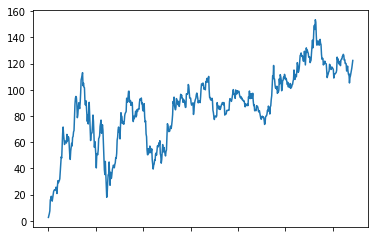

In [52]:
plt.show()
data["p_change"].cumsum().plot()

In [53]:
# 只保留涨幅（p_change）大于0.5的数据
data[data["p_change"]>0.5].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


In [54]:
# 混合逻辑筛选：
data[(data["p_change"]>0.5) & (data["open"]>15)].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-18,15.18,15.66,15.31,15.02,121538.71,0.13,0.86,14.788,14.464,14.058,104219.67,115997.81,112493.60,4.16
2015-03-24,15.38,16.16,15.68,15.28,153390.08,0.30,1.95,15.418,15.002,14.385,106966.89,105410.25,110336.03,5.25
2015-03-30,15.99,16.63,16.42,15.99,85090.45,0.65,4.12,15.620,15.469,14.722,108176.96,108109.99,108345.78,2.91
2015-04-01,16.18,16.48,16.29,16.00,68609.42,0.12,0.74,15.916,15.666,15.065,88679.47,95386.75,105692.28,2.35
2015-04-02,16.21,16.50,16.44,16.21,66336.32,0.15,0.92,16.218,15.772,15.229,84971.19,92655.96,104350.08,2.27


# 3. Pandas - 数据读取与存储

- 大部分数据会存在文件里，而不是数据库里
- pandas的API支持CSV，SQL，XLS，JSON，HDF5


## 3.1 Pandas读取csv数据API
- Read CSV (comma-separated) file into DataFrame: 
- pandas.read_csv(filepath_or_buffer, sep=‘, ’,names=None, usecols=None)

    - filepath_or_buffer:文件路径
    - names:列索引名字
    - usecols:指定读取的列名
    - return:DataFrame
   
   
## 3.2 Pandas读取hdf数据API
- read from the hdf:
- pandas.read_hdf(path_or_buf，key = None，mode ='r'，** kwargs)
    - path_or_buffer:文件路径
    - key:读取的键（一般忽略不写）
    - mode:打开文件的模式（可读可写）
    - return:The selected object
- 使用hdf文件之前，需要安装pytables库
    - pip install tables


## 3.3 Pandas保存数据到csv文件

- DataFrame.to_csv(path_or_buf=None, sep=', ’, columns=None,header=True, index=True, index_label=None, mode='w', encoding=None, rue)
    - path_or_buf : string or file handle, default None
    - sep : character, default ‘,’    # 以逗号作为分隔符
    - columns : sequence, optional
    - Columns to write，写入文件时指定新的列索引
    - header : boolean or list of string, default True,是否写进列索引值（第一次True，以后追加False）
    - index : boolean, default True，是否写进行索引值（第一次True，以后追加False）
    - index_label：string or sequence, or False, default None，是否将行索引当成一列数据
    

## 3.4 Pandas保存数据到hdf文件

- DataFrame.to_hdf(path_or_buf=None, key="") 
    - 必须要指定一个key，以保证存储的是二维数据
- hdf保存的是键值对
    - hdf = key(股票名):value(DataFrame，行：各项指标名，列：时间)


- 推荐保存文件的格式：hdf
    - 支持blosc
    - hdf节省空间，提高磁盘利用率
    - 跨平台，支持大数据分布式平台（hadoop、spark）
    - hadoop、spark的使用：调用API

In [55]:
# pandas读取csv文件
a = pd.read_csv("/Users/zhengtaizhong/Desktop/stock_day.csv")

# pandas保存数据到csv文件
a.to_csv("/Users/zhengtaizhong/Desktop/123.csv")

In [56]:
# pandas读取hdf文件
b = pd.read_hdf("/Users/zhengtaizhong/Desktop/day_close.h5")

# pandas保存数据到hdf文件
b.to_hdf("/Users/zhengtaizhong/Desktop/456.h5",key="x")
b.to_hdf("/Users/zhengtaizhong/Desktop/789.h5",key="y")

# 4. 数据处理

## 4.1 基本处理（缺失值，日期等）

- DataFrame的方法不修改原始数据，若要修改，赋值到另一个变量即可

- 处理缺失值：  
    - 删除缺失值（默认删除整行，axis=1删除整列）
        - DataFrame.dropna()
        - dropna()使用的前提是：缺失值的类型为np.nan
    - 将缺失值替换成平均数或众数
        - Series.fillna(Series.mean(), inplace=True)
    - 把缺失值转换成np.NaN类型，再删除缺失值
        - DataFrame.replace(to_replace="?", value=np.nan).dropna()


## 4.2.数据的离散化

- 将数据分开，然后用数字（0、1）标记
- pd.cut(Series,groups)
    - 可自定义分组的范围区间。
    - groups = [-np.inf, -7, -5, -3, 0, 3, 5, 7, np.inf] 
    
- pd.qcut(np.abs(Series),10)
    - 只能均分成n组
    
    
- 目的：统计离散化数据，便于分类

## 4.3 数据的合并

- pd.concat:沿轴合并
- pd.join:按照索引合并
- pd.merge:按照指定列进行合并


## 4.4 交叉表与透视表

- 交叉表：交叉表用于计算分组个数(寻找两个列之间的关系)
    - pd.crosstab(value1, value2)
- 透视表：跳过计算步骤，直接得出结果
    - DataFrame.pivot_table([], index=[])
    

## 4.5 数据的分组与聚合


## 4.1 缺失值处理

In [57]:
movie = pd.read_csv("/Users/zhengtaizhong/Desktop/IMDB-Movie-Data.csv")

# 判断是否有缺失值
pd.isnull(movie)


# 删除缺失值，默认删除行数据； axis=1 按列删除，视情况而定
# movie.dropna(axis=1)


# 填充缺失值，一般填充平均值
# inplace=True 替换；如果不写inplace，则不会把缺失值替换成平均数
movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean(),inplace=True)

movie["Revenue (Millions)"].head()

0    333.13
1    126.46
2    138.12
3    270.32
4    325.02
Name: Revenue (Millions), dtype: float64

In [60]:
# 若缺失值不是np.NaN的处理办法：
# 将【？】替换成【np.nan】
names = [str(i) for i in range(11)]

# 如果不指定列索引名，则数据的第一行数据，就是列索引名
cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", names=names)

# pandas一般不会更改原始数据。若需要更改，则可以赋值
cancer_dropna = cancer.replace(to_replace="?", value=np.nan).dropna()
cancer_dropna.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## 4.2 数据的离散化

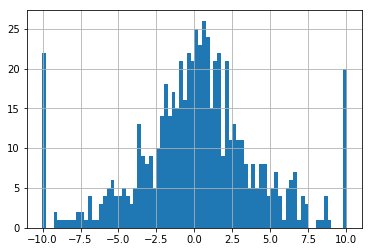

In [61]:
# 查看股票的涨跌幅度是否符合正态分布
data["p_change"].hist(bins=80)        # plt.show()

In [64]:
# “肥尾”现象，找到异常点

# 获得分组序列：涨跌幅度（的绝对值）分成10组
st = pd.qcut(np.abs(data["p_change"]),10) # 第一天在(2.1, 2.802]组，第二天在(1.106, 1.57]…… 
st.head()

2015-03-02      (2.1, 2.802]
2015-03-03     (1.106, 1.57]
2015-03-04     (1.106, 1.57]
2015-03-05       (1.57, 2.1]
2015-03-06    (7.198, 10.03]
Name: p_change, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.332] < (0.332, 0.73] < (0.73, 1.106] < (1.106, 1.57] ... (2.802, 3.662] < (3.662, 5.11] < (5.11, 7.198] < (7.198, 10.03]]

In [65]:
# 统计分组次数
st.value_counts()    # 有67天涨跌幅（的绝对值），在(1.106, 1.57] ；有65天涨跌幅（的绝对值），在(7.198, 10.03]……

# 异常区间（最外面的区间）：(7.198, 10.03] 

(1.106, 1.57]      67
(7.198, 10.03]     65
(3.662, 5.11]      65
(0.332, 0.73]      65
(-0.001, 0.332]    65
(2.802, 3.662]     64
(1.57, 2.1]        64
(5.11, 7.198]      63
(0.73, 1.106]      63
(2.1, 2.802]       62
Name: p_change, dtype: int64

In [70]:
# 哑变量矩阵：对每个数据进行（组）标记

# 对7个组进行哑变量矩阵：

# 1. 先(自定义)分组
groups = [-np.inf, -7, -5, -3, 0, 3, 5, 7, np.inf]    # 确定每组的范围
s_group = pd.cut(data["p_change"], groups)    # 把p_change的数据，分成7组
s_group.head()

2015-03-02    (0.0, 3.0]
2015-03-03    (0.0, 3.0]
2015-03-04    (0.0, 3.0]
2015-03-05    (0.0, 3.0]
2015-03-06    (7.0, inf]
Name: p_change, dtype: category
Categories (8, interval[float64]): [(-inf, -7.0] < (-7.0, -5.0] < (-5.0, -3.0] < (-3.0, 0.0] < (0.0, 3.0] < (3.0, 5.0] < (5.0, 7.0] < (7.0, inf]]

In [71]:
# 2. 生成7组哑变量矩阵
dummary = pd.get_dummies(bi,prefix="p_change")

# 目的：统计离散化数据，便于分类
dummary.head()

,"p_change_(-inf, -7.0]","p_change_(-7.0, -5.0]","p_change_(-5.0, -3.0]","p_change_(-3.0, 0.0]","p_change_(0.0, 3.0]","p_change_(3.0, 5.0]","p_change_(5.0, 7.0]","p_change_(7.0, inf]"
2015-03-02,0,0,0,0,1,0,0,0
2015-03-03,0,0,0,0,1,0,0,0
2015-03-04,0,0,0,0,1,0,0,0
2015-03-05,0,0,0,0,1,0,0,0
2015-03-06,0,0,0,0,0,0,0,1


## 3. pandas的合并

In [72]:
pd.concat([data,dummary], axis=1)    # 按列合并；否则都是NaN
# 若不赋值，则无法把合并后的表，添加到data

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"p_change_(-inf, -7.0]","p_change_(-7.0, -5.0]","p_change_(-5.0, -3.0]","p_change_(-3.0, 0.0]","p_change_(0.0, 3.0]","p_change_(3.0, 5.0]","p_change_(5.0, 7.0]","p_change_(7.0, inf]"
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,...,96291.73,3.30,0,0,0,0,1,0,0,0
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,...,117681.67,4.76,0,0,0,0,1,0,0,0
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,...,100812.93,2.30,0,0,0,0,1,0,0,0
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,...,98904.79,3.19,0,0,0,0,1,0,0,0
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,...,115090.18,6.16,0,0,0,0,0,0,0,1
2015-03-09,14.14,14.85,14.31,13.80,144945.66,0.03,0.21,13.470,13.312,13.312,...,120066.09,4.96,0,0,0,0,1,0,0,0
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,...,117372.87,3.46,0,0,0,0,1,0,0,0
2015-03-11,14.80,15.08,14.30,14.14,119708.43,-0.35,-2.39,14.140,13.603,13.603,...,117664.81,4.10,0,0,0,1,0,0,0,0
2015-03-12,14.11,14.80,14.11,13.95,84978.37,-0.19,-1.33,14.330,13.659,13.659,...,114032.98,2.91,0,0,0,1,0,0,0,0
2015-03-13,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,...,108763.91,2.10,0,0,0,0,1,0,0,0


In [74]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


### 判断股票的涨跌与什么因素有关
- 猜测：与星期有关

In [75]:
# 1. 生成星期的列数据
data["weekday"]= pd.to_datetime(data.index).weekday    # 通过to_datetime函数，可以把日期转换成星期。0-->周一；1-->周二

data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30,0
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4


In [77]:
# 2. 标记p_change, 大于0的标记为1，小于0的标记为0

# data["p_change"][data["p_change"] > 0] =1
# data["p_change"][data["p_change"] < 0] =0

data["positive"] = np.where(data["p_change"]>0,1,0)
data["p_change"].head()

2015-03-02    2.62
2015-03-03    1.44
2015-03-04    1.57
2015-03-05    2.02
2015-03-06    8.51
Name: p_change, dtype: float64

In [78]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday,positive
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30,0,1
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3,1
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4,1


## 4.4.1 交叉表

- 交叉表：交叉表用于计算分组个数(寻找两个列之间的关系)
    - pd.crosstab(value1, value2)

In [79]:
# 进行交叉表分析
corss_tab = pd.crosstab(data["weekday"], data["positive"])

# 周一（0），涨跌幅小于0的股票数有63个（跌）；大于0的股票数有62个（涨）
# 周二（1），涨跌幅小于0的股票数有55个；大于0的股票数有76个
corss_tab

positive,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [80]:
# 每个weekday的两列相加，所以axis应该是1
corss_tab.sum(axis=1)

weekday
0    125
1    131
2    132
3    128
4    127
dtype: int64

In [81]:
# 求出每天是positive的比例
tab = corss_tab.div(corss_tab.sum(1).astype(float),axis=0) # axis=0: 一行除以一行
tab

positive,0,1
weekday,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


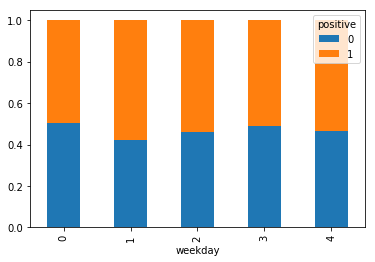

In [216]:
# 画交叉表柱状图分析
tab.plot(kind="bar", stacked=True)

## 4.4.2 透视表

- 使用透视表，直接跳过计算(比刚才的过程更加简单)
    - DataFrame.pivot_table([], index=[])

In [82]:
# 从周一到周五，股票涨跌大于0的比例
data.pivot_table(["positive"],index=["weekday"])

,positive
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


## 4.5 分组与聚合

- 分组
    - grouped = df.groupby(by="columns_name")
        - grouped是一个DataFrameGroupBy对象，只是一个可迭代对象，没有统计结果
        - 对某一列进行分组
        - 单独选择某一个信息，用于统计运算（聚合函数）

- 聚合函数（统计函数）：
    - 对单独的每个组进行统计

In [107]:
# 通过分组聚合(groupby)，实现cross_tab的功能
data.groupby(["weekday","positive"])["positive"].count()

weekday  positive
0        0           63
         1           62
1        0           55
         1           76
2        0           61
         1           71
3        0           63
         1           65
4        0           59
         1           68
Name: positive, dtype: int64

In [85]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [86]:
# 以color分组，求出(筛选)price1每组的平均值(聚类)，(选中price1这一列去聚合)
col.groupby(['color'])['price1'].mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [109]:
# 交叉表: 统计个数
col.groupby(["color","object"])["object"].count()

color  object 
green  pen        1
       pencil     1
red    ashtray    1
       pencil     1
white  pen        1
Name: object, dtype: int64

In [87]:
# 类似
col['price1'].groupby(col['color']).mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

### 案例：统计美国和中国的星巴克的数量

In [99]:
starbucks = pd.read_csv("/Users/zhengtaizhong/Desktop/directory.csv")

# 只是统计次数，不需要筛选
count = starbucks.groupby(["Country"]).count()
# 随便选一列，进行排序，默认从小到大。因为统计结果都一样，所以随便选了一个“Brand”排序
count.sort_values("Brand", ascending=False)
count.head()

# 混合#：对国家和省份进行分组统计
# country = star.groupby(["Country","State/Province"]).count()
# country.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Postcode,Phone Number,Timezone,Longitude,Latitude
Country,,,,,,,,,,,,
AD,1,1,1,1,1,1,1,1,1,1,1,1
AE,144,144,144,144,144,144,144,24,78,144,144,144
AR,108,108,108,108,108,108,108,100,29,108,108,108
AT,18,18,18,18,18,18,18,18,17,18,18,18
AU,22,22,22,22,22,22,22,22,0,22,22,22


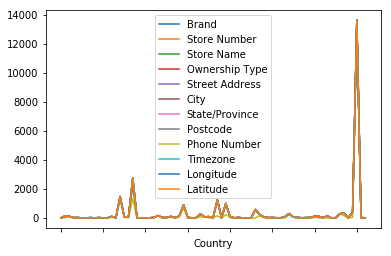

In [100]:
count.plot()

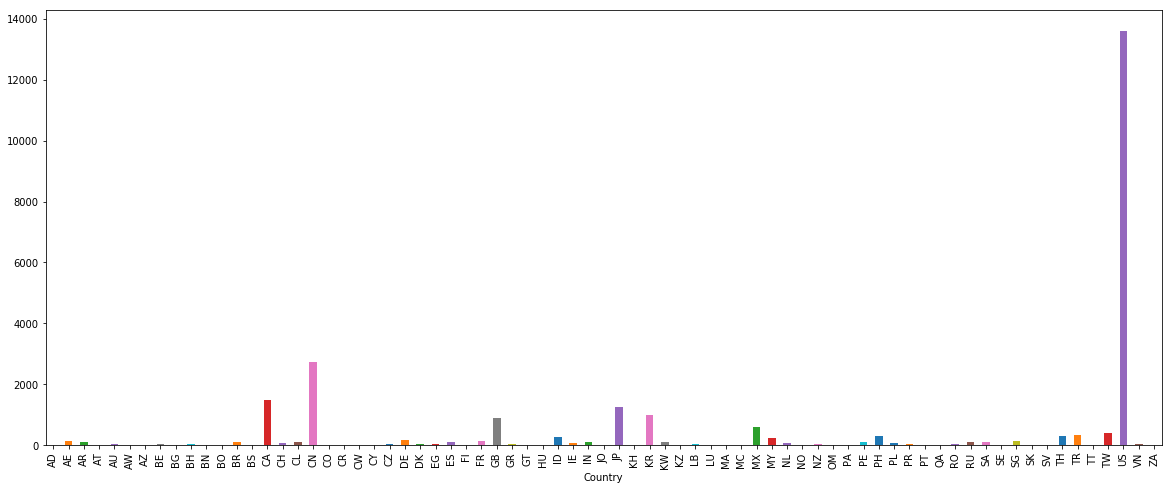

In [103]:
count["Brand"].plot(kind = "bar",figsize=(20,8))
plt.show()